# Part 3: SGD

In [1]:
import numpy as np # linear algebra
import pandas as pd #dataframe library
import sklearn # machine learning library
assert sklearn.__version__ >= '0.2'
from sklearn import datasets
import random
np.random.seed(seed=42) # to have same results each time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Question 1: Implement stochastic gradient and compare its performance with that of your gradient descent implementation from Part 1 on the same problem and dataset. What happens when both methods are run using the same stepsize? Do your observations confirm what has been discussed during the lecture?

In [2]:
dataset = sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
A = dataset['data']
Y = dataset['target']

def unison_shuffled_copies(a, b):
    '''
    Returns a similar permutation between arrays a,b
    '''
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

A_shuffled, Y_shuffled = unison_shuffled_copies(A, Y)

TRAINING_RATIO = 0.75

N = len(Y_shuffled) #numbers of rows
D = len(A_shuffled[0,:]) #number of features
N_TRAIN = int(TRAINING_RATIO*N) # number of rows in the training set
N_TEST = N - N_TRAIN # number of rows in the test set

A_train = A_shuffled[:N_TRAIN,:]
Y_train = Y_shuffled[:N_TRAIN]

A_test = A_shuffled[N_TRAIN:,:]
Y_test = Y_shuffled[N_TRAIN:]

#we will normalize our data as well to better performance (less anisotropy, so the Gradient descent sould be faster)
mean = A_train.mean(axis=0)
std = A_train.std(axis=0)
A_train = (A_train-mean)/std

In [68]:
#SGD implementation 
n_epochs = 50
step_size = 0.00001
iter_per_epoch = A_train.shape[0]

x = np.random.rand(D) # random initialization

loss_function_array_sgd = []
epochs = []

for epoch in range(n_epochs):
    epochs.append(epoch)
    
    loss_function_train = np.linalg.norm(np.dot(A_train,x)-Y_train)**2
    loss_function_array_sgd.append(loss_function_train)

    for i in range(iter_per_epoch):
        random_index = np.random.randint(iter_per_epoch)
        Ai = A_train[random_index:random_index+1]
        Yi = Y_train[random_index:random_index+1]
        gradients = 2*Ai.T.dot(Ai.dot(x) - Yi)
        x = x - step_size * gradients

In [69]:
#GD implementation 
n_epochs = 50
step_size = 0.00001
iter_per_epoch = A_train.shape[0]

x = np.random.rand(D) # random initialization

loss_function_array = []
epochs = []

for epoch in range(n_epochs):
    epochs.append(epoch)
    
    loss_function_train = np.linalg.norm(np.dot(A_train,x)-Y_train)**2
    loss_function_array.append(loss_function_train)
    gradients = 2*A_train.T.dot(np.dot(A_train,x)-Y_train)
    x = x - step_size * gradients

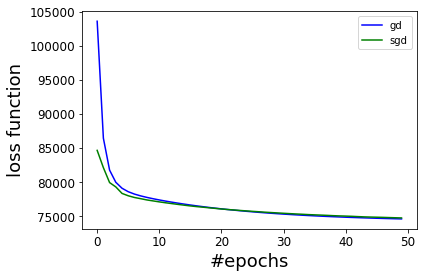

In [70]:
plt.plot(epochs, loss_function_array, color = 'b', label = 'gd')
plt.plot(epochs, loss_function_array_sgd, color='g', label = 'sgd')
plt.xlabel("#epochs", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

Per each single iteration, the GD is more efficient than SGD but that is because it relies on more data per iteration (n) than sgd (only one). The right way of comparing them is by # of epochs, and in that sense sgd is more efficient, especially if the data is quite redundant.

### Question 2: Find a value for the batch size that realizes a good compromise between gradient descent and stochastic gradient.


In [74]:
#Mini batch implementation 
n_epochs = 50
step_size = 0.00001
minibatch_size = 100
iter_per_epoch = round(A_train.shape[0]/minibatch_size)

x = np.random.rand(D) # random initialization

loss_function_array_mgd = []
epochs = []

for epoch in range(n_epochs):
    epochs.append(epoch)
    loss_function_train = np.linalg.norm(np.dot(A_train,x)-Y_train)**2
    loss_function_array_mgd.append(loss_function_train)

    for i in range(iter_per_epoch):
        shuffled_indices = np.random.permutation(A_train.shape[0])
        A_train_shuffled = A_train[shuffled_indices]
        Y_train_shuffled = Y_train[shuffled_indices]
        random_index = np.random.randint(A_train.shape[0]-minibatch_size)
        Ai = A_train_shuffled[random_index:random_index+minibatch_size]
        Yi = Y_train_shuffled[random_index:random_index+minibatch_size]
        gradients = 2*Ai.T.dot(Ai.dot(x) - Yi)
        x = x - step_size * gradients

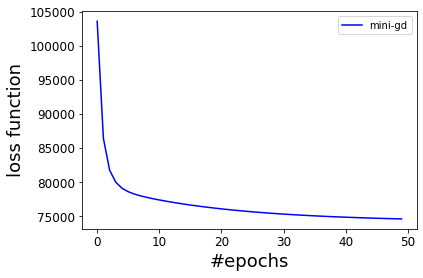

In [75]:
plt.plot(epochs, loss_function_array, color = 'b', label = 'mini-gd')
plt.xlabel("#epochs", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

Having a batch size too small, led the method to be similar to SGD (decrease only in expectancy), whereas having a high value of batch size led to a behaviour similar to GD. As we don't have too much data, we can rely on GD and choose a high batch size.

### Question 3: Compare your stochastic gradient method with one of the advanced variants seen in class on your selected problem. Discuss your results, and what interpretation you can draw from them.
